In [1]:
# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
train_dir = "chest_xray\train"
val_dir = "chest_xray\val"
test_dir = "chest_xray\test"

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Correct paths (adjust with your actual folder location)
base_dir = r"chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# ✅ Check paths exist
for folder in [train_dir, val_dir, test_dir]:
    if not os.path.exists(folder):
        raise FileNotFoundError(f"❌ Folder not found: {folder}")
    else:
        print(f"✅ Found folder: {folder}")

# ✅ Image Generators with Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Load Data from Directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("\n✅ Data generators created successfully!")


✅ Found folder: chest_xray\train
✅ Found folder: chest_xray\val
✅ Found folder: chest_xray\test
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

✅ Data generators created successfully!


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Ankan Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=15)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.7678 - loss: 0.4856 - val_accuracy: 0.6250 - val_loss: 0.7894
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.8809 - loss: 0.2868 - val_accuracy: 0.6250 - val_loss: 0.8379
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8951 - loss: 0.2558 - val_accuracy: 0.8125 - val_loss: 0.4615
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 826ms/step - accuracy: 0.9034 - loss: 0.2421 - val_accuracy: 0.8125 - val_loss: 0.5119
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 643ms/step - accuracy: 0.9133 - loss: 0.2219 - val_accuracy: 0.8125 - val_loss: 0.3963
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 779ms/step - accuracy: 0.9133 - loss: 0.2197 - val_accuracy: 0.6875 - val_loss: 0.8705
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 860ms/step - accuracy: 0.9235 - loss: 0.1971 - val_accuracy: 0.8125 - val_loss: 0.6353
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 863ms/step - accuracy: 0.9197 - loss: 0.

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8782 - loss: 0.3665

✅ Test Accuracy: 87.82%


In [9]:
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
print("\n📊 Classification Report:\n")
print(classification_report(test_generator.classes, y_pred, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step

📊 Classification Report:

              precision    recall  f1-score   support

      Normal       0.98      0.69      0.81       234
   Pneumonia       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624



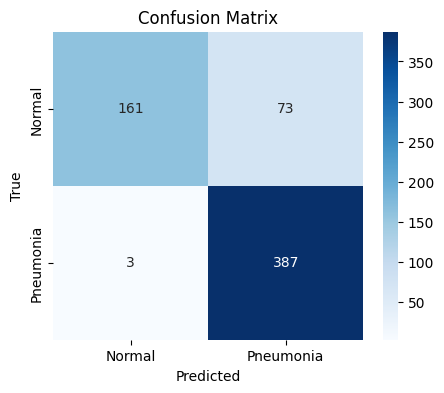

In [10]:
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

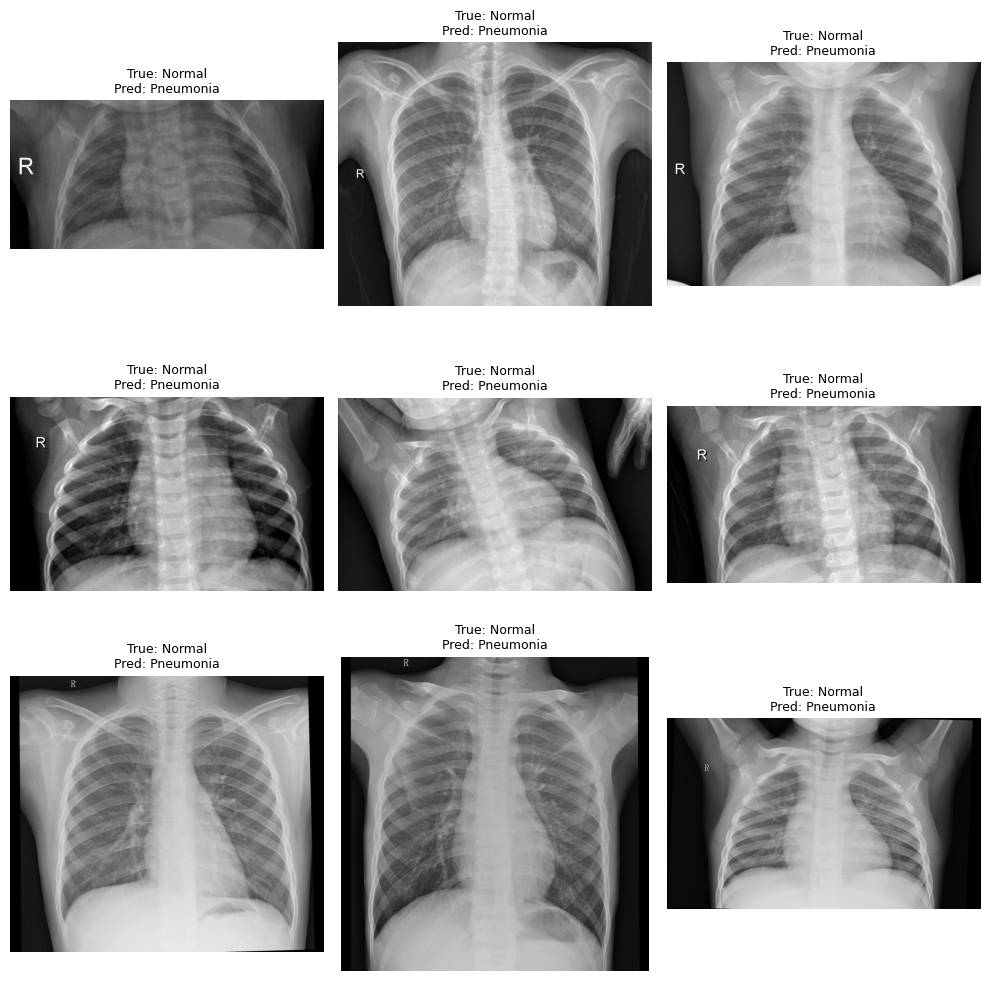

In [11]:
misclassified_indices = np.where(y_pred != test_generator.classes)[0]
if len(misclassified_indices) > 0:
    plt.figure(figsize=(10,10))
    for i, idx in enumerate(misclassified_indices[:9]):
        img_path = test_generator.filepaths[idx]
        img = plt.imread(img_path)
        plt.subplot(3,3,i+1)
        plt.imshow(img, cmap='gray')
        true_label = 'Normal' if test_generator.classes[idx]==0 else 'Pneumonia'
        pred_label = 'Normal' if y_pred[idx]==0 else 'Pneumonia'
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications found.")


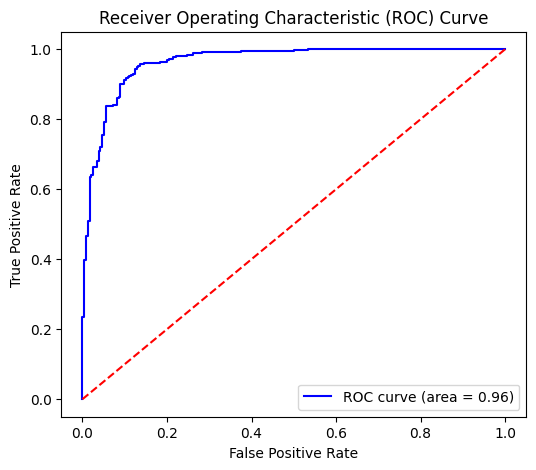

In [12]:
fpr, tpr, thresholds = roc_curve(test_generator.classes, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [13]:
model.save("medical_xray_pneumonia_model.h5")
print("\n💾 Model saved as medical_xray_pneumonia_model.h5")


💾 Model saved as medical_xray_pneumonia_model.h5


In [14]:
loaded_model = load_model("medical_xray_pneumonia_model.h5")
print("\n✅ Model loaded successfully for deployment!")


✅ Model loaded successfully for deployment!


In [21]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
loaded_model = load_model("medical_xray_pneumonia_model.h5")

def predict_new_image(img_path):
    # ✅ Convert relative path to absolute (safe cross-platform)
    img_path = os.path.join(os.getcwd(), img_path)
    
    # ✅ Load and preprocess image
    img = image.load_img(img_path, target_size=(150,150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # ✅ Predict
    prediction = loaded_model.predict(img_array)[0][0]
    label = "Pneumonia" if prediction > 0.5 else "Normal"
    print(f"🩺 Prediction: {label} (Confidence: {prediction:.2f})")

# ✅ Example usage (relative path, note forward slashes)
predict_new_image("chest_xray/chest_xray/test/PNEUMONIA/person78_bacteria_378.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
🩺 Prediction: Pneumonia (Confidence: 1.00)
